In [1]:
import json
import numpy as np
from Necessary_functions import *



file_name = "H2_data_qedfci_pqed_pqed_minimal.json"
# Load the molecule data from the JSON file
with open(file_name, 'r') as json_file:
    molecule_data = json.load(json_file)


# Extract values from the loaded JSON data into Python variables
molecule_name = molecule_data["molecule_data"]["molecule_name"]
mA_au = molecule_data["molecule_data"]["mA_au"]
mB_au = molecule_data["molecule_data"]["mB_au"]
mu_au = molecule_data["molecule_data"]["mu_au"]
bondlength_scan_vals = np.array(molecule_data["molecule_data"]["bondlength_scan_vals"])
omega = molecule_data["molecule_data"]["omega"]
CI_Level = molecule_data["molecule_data"]["CI_Level"]
n_photon_basis_states = molecule_data["molecule_data"]["n_photon_basis_states"]
basis_set = molecule_data["molecule_data"]["basis_set"]
ci_info = molecule_data["molecule_data"]["ci_info"]
pqed_info = molecule_data["molecule_data"]["pqed_info"]
pqed_minimal_info = molecule_data["molecule_data"]["pqed_minimal_info"]
lambda_values = np.array(molecule_data["lambda_values"])

qed_ci = np.array(molecule_data["qed-ci"])
pqed_minimal = np.array(molecule_data["pqed_minimal"])
pqed = np.array(molecule_data["pqed_data"])

ci_lp_index = ci_info["lower_polariton_index"]
ci_up_index = ci_info["upper_polariton_index"]

pqed_lp_index = pqed_info["lower_polariton_index"]
pqed_up_index = pqed_info["upper_polariton_index"]

pqed_minimal_lp_index = pqed_minimal_info["lower_polariton_index"]
pqed_minimal_up_index = pqed_minimal_info["upper_polariton_index"]


# Print the extracted variables
print("Molecule Name:", molecule_name)
print("Mass A (au):", mA_au)
print("Mass B (au):", mB_au)
print("Reduced Mass (mu_au):", mu_au)
print("Bond Length Scan Values:", bondlength_scan_vals)
print("Omega:", omega)
print("CI Level:", CI_Level)
print("Number of Photon Basis States:", n_photon_basis_states)
print("Basis Set:", basis_set)
print("CI Info:", ci_info)
print("PQED Info:", pqed_info)
print("PQED Minimal Info:", pqed_minimal_info)
print("Lambda Values:", lambda_values)
print("QED-CASCI:", qed_ci)
print("PQED Minimal:", pqed_minimal)



Molecule Name: H2
Mass A (au): 1837.1527318119486
Mass B (au): 1837.1527318119486
Reduced Mass (mu_au): 918.5763659059743
Bond Length Scan Values: [0.25       0.26767677 0.28535354 0.3030303  0.32070707 0.33838384
 0.35606061 0.37373737 0.39141414 0.40909091 0.42676768 0.44444444
 0.46212121 0.47979798 0.49747475 0.51515152 0.53282828 0.55050505
 0.56818182 0.58585859 0.60353535 0.62121212 0.63888889 0.65656566
 0.67424242 0.69191919 0.70959596 0.72727273 0.74494949 0.76262626
 0.78030303 0.7979798  0.81565657 0.83333333 0.8510101  0.86868687
 0.88636364 0.9040404  0.92171717 0.93939394 0.95707071 0.97474747
 0.99242424 1.01010101 1.02777778 1.04545455 1.06313131 1.08080808
 1.09848485 1.11616162 1.13383838 1.15151515 1.16919192 1.18686869
 1.20454545 1.22222222 1.23989899 1.25757576 1.27525253 1.29292929
 1.31060606 1.32828283 1.3459596  1.36363636 1.38131313 1.3989899
 1.41666667 1.43434343 1.4520202  1.46969697 1.48737374 1.50505051
 1.52272727 1.54040404 1.55808081 1.57575758 1.593

(10, 100, 10)
(10, 100, 10)
(10, 100, 10)


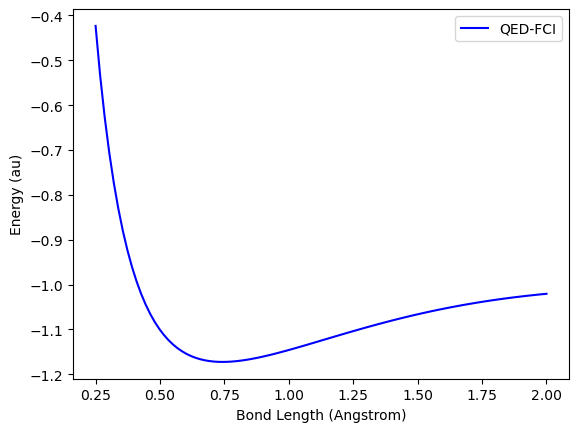

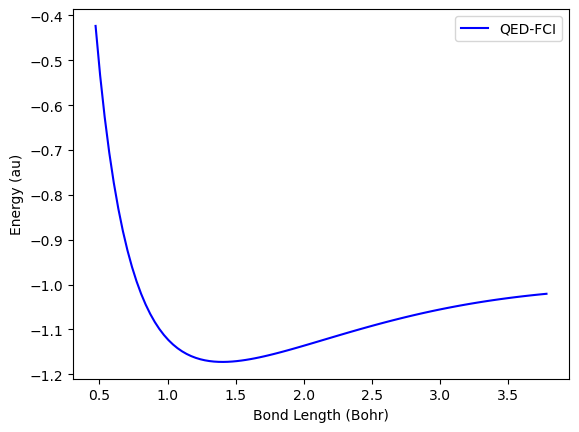

In [2]:
#qed_ci = np.array(molecule_data["qed-ci"])
#pqed_minimal = np.array(molecule_data["pqed_minimal"])
#pqed = np.array(molecule_data["pqed_data"])
print(np.shape(qed_ci))
print(np.shape(pqed_minimal))
print(np.shape(pqed))


plt.plot(bondlength_scan_vals, qed_ci[0,:,0], label='QED-FCI', color='blue')
#plt.plot(bondlength_scan_vals, pqed_minimal[0,:,1], label='pQED(min)', color='red', linestyle='--')
#plt.plot(bondlength_scan_vals, pqed[0,:,1], label='pQED', color='green', linestyle=':')
#plt.plot(bondlength_scan_vals, qed_ci[0,:,1], label='QED-FCI', color='blue')
#plt.plot(bondlength_scan_vals, pqed_minimal[0,:,1], label='pQED(min)', color='red', linestyle='--')
#plt.plot(bondlength_scan_vals, pqed[0,:,1], label='pQED', color='green', linestyle=':')
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Energy (au)')
plt.legend()
plt.show()

# store the bondlength scan values in an array in Bohr units
bondlength_scan_vals_bohr = bondlength_scan_vals / 0.52917721067

# now plot in Bohr units
plt.plot(bondlength_scan_vals_bohr, qed_ci[0,:,0], label='QED-FCI', color='blue')
plt.xlabel('Bond Length (Bohr)')
plt.ylabel('Energy (au)')
plt.legend()
plt.show()

# store qed_ci_[0,:,0] in a numpy array
qed_ci_0_0 = np.array(qed_ci[0,:,0]) 

0.03340424969243638
0.08080808080808088
Expected fundamental frequency: 1.0
Calculated fundamental frequency: 0.9991974119228075
Difference: -0.0008025880771924676
argmin: 28


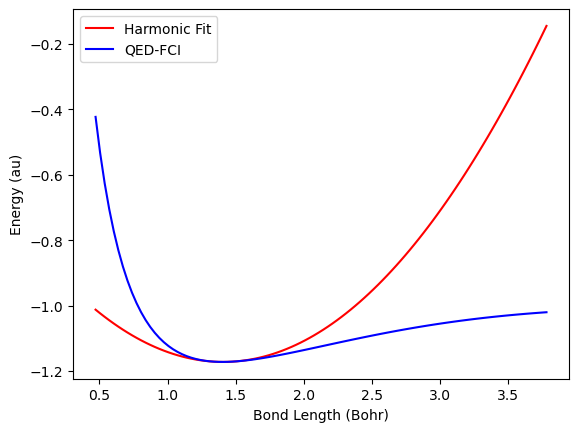

Harmonic fundamental frequency: 0.019938562835029868
Finite difference fundamental frequency: 0.01893711881314708
Difference: -0.0010014440218827879
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.01898106099719188


In [3]:
# perform finite differences to solve the vibrational schrodinger equation
mu = 918.5763659059743
N = 100

h = bondlength_scan_vals_bohr[1] - bondlength_scan_vals_bohr[0]
print(h)

# create a function that performs the finite difference method on a given potential with a given reduced mass
def finite_difference(potential, mu, h, five_point=False):
    N = len(potential)
    # Create the finite difference matrix
    T = np.zeros((N-2)**2).reshape(N-2,N-2)

    if five_point:
        # 5-point stencil
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -30
                elif np.abs(i-j)==1:
                    T[i,j]=16
                elif np.abs(i-j)==2:
                    T[i,j]=-1

    else:        
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -2
                elif np.abs(i-j)==1:
                    T[i,j]=1
                else:
                    T[i,j]=0


    # now we need to create the potential energy matrix
    V = np.zeros((N-2)**2).reshape(N-2,N-2)
    for i in range(N-2):
        for j in range(N-2):
            if i==j:
                V[i,j]=potential[i+1]

    # build the total Hamiltonian
    H = T / (2 * mu * h**2) + V

    # diagonalize the Hamiltonian
    E, V = np.linalg.eigh(H)
    return E, V



# test out the finite difference method on a case where we know the answer
# m = 1
# k = 1
# omega = np.sqrt(k/m)
# N = 1000
k = 1
mass = 1
# create an array of position values
x_pos = np.linspace(-4, 4, 100)

# get the h value
h_val = x_pos[1] - x_pos[0]
print(h_val)


# create the potential energy function
V_pos = 0.5 * k * x_pos**2

expected_fundamental = np.sqrt(k/mass)

E_test, V_test = finite_difference(V_pos, mass, h_val)
print("Expected fundamental frequency:", expected_fundamental)

calculated_fundamental = E_test[1] - E_test[0]
print("Calculated fundamental frequency:", calculated_fundamental)
print("Difference:", calculated_fundamental - expected_fundamental)


#### Now try to fit a Harmonic model to the data
arg_min = np.argmin(qed_ci_0_0)
print(F"argmin: {arg_min}")

# get the minimum value of the potential
V_min = qed_ci_0_0[arg_min]

# now perform finite differences on the potential at the minimum to estimate the second derivative
# using f_xx = (-1*f[i-2]+16*f[i-1]-30*f[i+0]+16*f[i+1]-1*f[i+2])/(12*1.0*h**2
f_xx = (-1*qed_ci_0_0[arg_min-2] + 16*qed_ci_0_0[arg_min-1] - 30*qed_ci_0_0[arg_min] + 16*qed_ci_0_0[arg_min+1] - 1*qed_ci_0_0[arg_min+2]) / (12 * h**2)

r_eq = bondlength_scan_vals_bohr[arg_min]

V_harmonic = V_min + 0.5 * f_xx * (bondlength_scan_vals_bohr - r_eq)**2
plt.plot(bondlength_scan_vals_bohr, V_harmonic, label='Harmonic Fit', color='red')
plt.plot(bondlength_scan_vals_bohr, qed_ci_0_0, label='QED-FCI', color='blue')
plt.xlabel('Bond Length (Bohr)')
plt.ylabel('Energy (au)')
plt.legend()
plt.show()

# now let's compare the Harmonic fundamental to the QED-FCI fundamental
E_fund_harmonic = np.sqrt(f_xx / mu)
print("Harmonic fundamental frequency:", E_fund_harmonic)

E_fd, V_fd = finite_difference(qed_ci_0_0, mu, h)

print("Finite difference fundamental frequency:", E_fd[1] - E_fd[0])
print("Difference:", E_fd[1] - E_fd[0] - E_fund_harmonic)

########### Input we want to look at later!
# build total Hamiltonian
#H = T / (2 * mu * h**2) + V

# diagonalize the Hamiltonian
#E, V = np.linalg.eigh(H)

# print the first 10 eigenvalues
#print(E[1]-E[0])

fcf_s0_lp = get_fcf_matrix(qed_ci[0][:,  0 ], qed_ci[0][:, 0 ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

In [4]:
print((0.01898106099719188 - 0.01893711881314708)/ 0.01893711881314708 * 100)

0.23204260626115739


In [ ]:

with open("Uncoupled_molecules_data.json", 'r') as json_file:
    molecule_data_uncoupled_1_photon = json.load(json_file)
molecule_name = file_name.split('_')[0]
print(molecule_name)
molecule_data_uncoupled_1_photon = np.array(molecule_data_uncoupled_1_photon[molecule_name]["Uncoupled_Surfaces"])
plt.plot(molecule_data_uncoupled_1_photon)

#fit in the data into pqed minimal, pqed , qed-ci, 

no_coupling_pqed = np.zeros_like(pqed[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed= pqed.tolist()
pqed.insert(0, no_coupling_pqed.tolist())  
pqed = np.array(pqed)



# not very clear which one should be lp and which should be up
no_coupling_pqed = np.zeros_like(pqed_minimal[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_minimal_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_minimal_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed_minimal= pqed_minimal.tolist()
pqed_minimal.insert(0, no_coupling_pqed.tolist())  
pqed_minimal = np.array(pqed_minimal)


no_coupling_qed_ci= np.zeros_like(qed_ci[0])
no_coupling_qed_ci[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_qed_ci[:, ci_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_qed_ci[:, ci_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

qed_ci= qed_ci.tolist()
qed_ci.insert(0, no_coupling_qed_ci.tolist())  
qed_ci= np.array(qed_ci)

lambda_values = lambda_values.tolist()
lambda_values.insert(0, 0.0)
lambda_values = np.array(lambda_values)
print(lambda_values)


In [ ]:
#calculate Huang Rhys, FC-Limit between S0 and LP and S0 and UP


np.set_printoptions(precision = 3)
fcf_limit_s0_lp_ci = []
fcf_limit_s0_up_ci = []

fcf_limit_s0_lp_pqed = []
fcf_limit_s0_up_pqed = []

fcf_limit_s0_lp_pqed_minimal = []
fcf_limit_s0_up_pqed_minimal = []




HRs_S0_lp_ci =[]
HRs_S0_up_ci = []

HRs_S0_lp_pqed =[]
HRs_S0_up_pqed= []

HRs_S0_lp_pqed_minimal =[]
HRs_S0_up_pqed_minimal = []



index_pes = 0


for lambda_val in lambda_values:


    #s0 to LP
    fcf_s0_lp = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_ci.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_ci.append(fcf_s0_up[0,0])

    fcf_s0_lp = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_pqed.append(fcf_s0_up[0,0])

    fcf_s0_lp = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed_minimal.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_pqed_minimal.append(fcf_s0_up[0,0])



        #s0 to LP
    
    HRs_S0_lp_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))


    index_pes+=1

fcf_limit_s0_lp_ci = np.array(fcf_limit_s0_lp_ci)
fcf_limit_s0_up_ci =np.array(fcf_limit_s0_up_ci)

fcf_limit_s0_lp_pqed = np.array(fcf_limit_s0_lp_pqed)
fcf_limit_s0_up_pqed = np.array(fcf_limit_s0_up_pqed)

fcf_limit_s0_lp_pqed_minimal = np.array(fcf_limit_s0_lp_pqed_minimal )
fcf_limit_s0_up_pqed_minimal = np.array(fcf_limit_s0_up_pqed_minimal)


HRs_S0_lp_ci =np.array(HRs_S0_lp_ci )
HRs_S0_up_ci = np.array(HRs_S0_up_ci)

HRs_S0_lp_pqed =np.array(HRs_S0_lp_pqed)
HRs_S0_up_pqed= np.array(HRs_S0_up_pqed)

HRs_S0_lp_pqed_minimal =np.array(HRs_S0_lp_pqed_minimal)
HRs_S0_up_pqed_minimal = np.array(HRs_S0_up_pqed_minimal )


# plt.plot(fcf_limit_s0_lp_ci)
# plt.plot(fcf_limit_s0_lp_pqed)
# plt.plot(fcf_limit_s0_lp_pqed_minimal)
# plt.plot(fcf_limit_s0_up_ci)
# plt.plot(fcf_limit_s0_up_pqed)
# plt.plot(fcf_limit_s0_up_pqed_minimal)
# plt.show()


# plt.plot(HRs_S0_up_pqed_minimal)
# plt.plot(HRs_S0_lp_pqed_minimal)
# plt.plot(HRs_S0_up_pqed)
# plt.plot(HRs_S0_lp_pqed)
# plt.plot(HRs_S0_up_ci)
# plt.plot(HRs_S0_lp_ci)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()





# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

In [ ]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
#FCICOLOUR = "salmon"
#PQEDPROJCOLOUR = "green"
#PQEDCOLOUR = "royalblue"
#FCIPROJCOLOUR = "rebeccapurple"
#FCIPROJCOLOUR2 = 'darkorchid'


import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_lp_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()




#CICOLOUR = "salmon"
#PQEDCOLOUR = "green"
#PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_up_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

In [ ]:
lighter_blue = '#ADD8E6'  # Light Blue
lighter_green = '#90EE90'  # Light Green
lighter_red = '#FFCCCB'  # Light Red (Pale Red)
lighter_blue = '#6495ED'  # Darker Blue
lighter_green = '#66CDAA'  # Darker Green
lighter_red = '#FF6F61'  # Darker Red


#change surface index here
surface_index = 0

# Your data loading and processing code

plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  0 ] , label = "S0 PQED MINIMAL", color=lighter_green)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_lp_index ] , label = "LP PQED MINIMAL", color=lighter_red)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_up_index], label = "UP PQED MINIMAL", color=lighter_blue)



# Plot PQED and QED-CI surfaces as you did before
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  0 ] , label = "S0 PQED", color='darkgreen')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_lp_index ] , label = "LP PQED", color='darkred')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_up_index], label = "UP PQED", color='darkblue')


plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  0], label = "S0 QED-CI", color='green')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:, ci_lp_index ], label = "LP QED-CI", color='red')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  ci_up_index ], label = "UP QED-CI", color='blue')

#get min and max for scaling vib wavefunctions; 

max_val = np.max(qed_ci[surface_index][:,  ci_up_index])
min_val = np.min(qed_ci[surface_index][:,  0 ])
diff = max_val - min_val


r_data = bondlength_scan_vals

# Define how many vibrational wavefunctions to plot
num_vibs_to_plot = 1

# Use spline interpolation to smooth the wavefunctions
spline_r_data = np.linspace(r_data[1], r_data[-1], 1000)



r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color=lighter_green, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color=lighter_red, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color=lighter_blue, alpha=0.3)







r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color='darkgreen', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color='darkred', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='darkblue', alpha=0.3)






r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,   ci_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,ci_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Similarly, plot and fill for the decluttered surfaces
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 QED-CI (with some alpha for transparency)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i] , color='green', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP QED-CI
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i],  np.ones_like(spline_r_data) *lp_vals[i],color='red', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP QED-CI
    plt.fill_between(spline_r_data, (up_wavefunction**2 * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='blue', alpha=0.3)

# # Display the legend and show the plot
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length (angstrom)")
plt.legend()
plt.show()